<h1>Installing RDKit</h1>

In [1]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
# conda_installer.install()
conda_installer.install()
# !/root/miniconda/bin/conda info -e

add /home/ali/miniconda/lib/python3.8/site-packages to PYTHONPATH
all packages are already installed


In [2]:
import rdkit
import deepchem as dc

2022-03-18 19:32:55.346708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-18 19:32:55.346728: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras import layers

In [4]:
df = pd.read_csv('../Datasets/molecule_parameters_final.csv')
df = df.dropna()

In [5]:
df

,complex-name,gb-complex-etot,gb-complex-1-4-eel,gb-complex-eelec,gb-complex-egb,gb-complex-esurf,gb-protein-etot,gb-protein-1-4-eel,gb-protein-eelect,gb-protein-egb,...,pb-protein-vdwaals,pb-protein-eelec,pb-protein-epb,pb-protein-ecavity,pb-ligand-etot,pb-ligand-vdwaals,pb-ligand-eelec,pb-ligand-epb,pb-ligand-ecavity,ddg
0,10gs,-16145.9190,18478.8142,-31052.1742,-3659.4630,86.9041,-16042.9095,18034.9833,-30493.1722,-3672.7126,...,-4077.8698,-30493.1722,-3650.6491,87.9920,-565.1881,-10.1928,-416.8647,-141.8681,3.7375,-8.841927
1,1a1e,-9777.1684,7030.7012,-13515.0036,-3349.3791,56.5130,-9499.3955,7189.5223,-13366.9577,-3378.1703,...,-1901.0486,-13366.9577,-3333.0961,56.2103,-173.5190,-11.4008,-96.6715,-69.9064,4.4598,-8.289306
2,1a30,-6925.5462,9349.4510,-14111.7670,-2211.3839,48.1538,-6881.3365,8949.8465,-13675.6929,-2204.7807,...,-1777.0400,-13675.6929,-2179.8309,49.2906,-645.4443,-9.3186,-381.1129,-257.9893,2.9765,-5.940670
3,1a4k,-29413.8956,40100.7078,-61088.2896,-8626.6708,200.3571,-29189.9201,40319.8406,-60991.3946,-8719.3884,...,-1084.3398,-60991.3946,-8730.0602,201.0222,-27.4572,-6.0182,74.3491,-99.2366,3.4485,-11.052408
4,1a4r,-14436.7381,16726.9825,-26744.9283,-4516.3615,97.5691,-13647.6149,18021.0326,-27237.1053,-4529.6519,...,-1733.7572,-27237.1053,-4478.1330,98.1097,486.8763,-5.8718,583.2385,-93.5441,3.0538,-9.201130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,7std,-20699.0549,21176.0749,-35706.5273,-6267.2953,98.6928,-20681.1007,21209.5397,-35704.9166,-6285.3439,...,-5167.3253,-35704.9166,-6203.5215,99.6200,-14.5959,-4.6906,0.1221,-12.7624,2.7350,-14.810227
2910,7upj,-7203.9558,8347.2909,-13713.5975,-1887.4373,49.7881,-7088.4059,8615.8940,-13766.9993,-1988.7703,...,-1672.4526,-13766.9993,-1966.3313,51.4697,66.5143,-7.2150,102.8524,-32.7172,3.5941,-11.729368
2911,8a3h,-11311.9593,14514.5548,-17122.3046,-8760.1462,55.9367,-11349.4465,14306.8313,-16401.8897,-9310.9686,...,-3055.0110,-16401.8897,-9229.1824,56.5806,-199.9330,-6.2099,-84.0375,-112.4157,2.7302,-5.609097
2912,8cpa,-10896.0768,13847.1770,-22434.5575,-2366.9434,58.2471,-10848.4034,13472.1409,-21904.4816,-2475.0882,...,-2292.8024,-21904.4816,-2442.5401,59.0256,-544.4429,-8.5007,-439.7892,-99.9047,3.7517,-12.641192


In [49]:
def create_autoencoder():
    input_g = keras.Input(shape=(15,))
    encoded = layers.Dense(10, activation='relu')(input_g)
    encoded = layers.Dense(10, activation='sigmoid')(encoded)
    decoded = layers.Dense(10, activation = 'relu')(encoded)
    decoded = layers.Dense(15)(decoded)
    return keras.Model(input_g, encoded), keras.Model(input_g, decoded)

In [50]:
e, m = create_autoencoder()

In [51]:
x_train = np.absolute(df[training_columns][:2000].to_numpy())
from scipy import stats
x_train = stats.zscore(x_train)
y_train = x_train

In [52]:
m.compile(optimizer='adam', loss='MSE')

In [53]:
m.fit(x_train, y_train, epochs=200)

Epoch 1/200
63/63 [==============================] - 0s 696us/step - loss: 0.9737
Epoch 2/200
63/63 [==============================] - 0s 699us/step - loss: 0.8815
Epoch 3/200
63/63 [==============================] - 0s 667us/step - loss: 0.7446
Epoch 4/200
63/63 [==============================] - 0s 688us/step - loss: 0.6401
Epoch 5/200
63/63 [==============================] - 0s 712us/step - loss: 0.5643
Epoch 6/200
63/63 [==============================] - 0s 681us/step - loss: 0.5024
Epoch 7/200
63/63 [==============================] - 0s 674us/step - loss: 0.4559
Epoch 8/200
63/63 [==============================] - 0s 751us/step - loss: 0.4231
Epoch 9/200
63/63 [==============================] - 0s 688us/step - loss: 0.3989
Epoch 10/200
63/63 [==============================] - 0s 697us/step - loss: 0.3800
Epoch 11/200
63/63 [==============================] - 0s 675us/step - loss: 0.3631
Epoch 12/200
63/63 [==============================] - 0s 715us/step - loss: 0.3485
Epoch 13/200


63/63 [==============================] - 0s 755us/step - loss: 0.0715
Epoch 100/200
63/63 [==============================] - 0s 728us/step - loss: 0.0702
Epoch 101/200
63/63 [==============================] - 0s 711us/step - loss: 0.0683
Epoch 102/200
63/63 [==============================] - 0s 711us/step - loss: 0.0669
Epoch 103/200
63/63 [==============================] - 0s 706us/step - loss: 0.0656
Epoch 104/200
63/63 [==============================] - 0s 709us/step - loss: 0.0642
Epoch 105/200
63/63 [==============================] - 0s 690us/step - loss: 0.0630
Epoch 106/200
63/63 [==============================] - 0s 695us/step - loss: 0.0619
Epoch 107/200
63/63 [==============================] - 0s 687us/step - loss: 0.0609
Epoch 108/200
63/63 [==============================] - 0s 687us/step - loss: 0.0595
Epoch 109/200
63/63 [==============================] - 0s 667us/step - loss: 0.0582
Epoch 110/200
63/63 [==============================] - 0s 717us/step - loss: 0.0572
Epoch 

63/63 [==============================] - 0s 686us/step - loss: 0.0298
Epoch 197/200
63/63 [==============================] - 0s 731us/step - loss: 0.0288
Epoch 198/200
63/63 [==============================] - 0s 727us/step - loss: 0.0293
Epoch 199/200
63/63 [==============================] - 0s 674us/step - loss: 0.0290
Epoch 200/200
63/63 [==============================] - 0s 692us/step - loss: 0.0294


In [7]:
training_columns = [col for col in df.columns if (col[:3] == 'gb-' and not col.__contains__('etot')) or (col.__contains__('vdwaals'))]

In [7]:
df['gb-overall-1-4-eel'] = df.apply(lambda row: row['gb-complex-1-4-eel'] - row['gb-protein-1-4-eel'] - row['gb-ligand-1-4-eel'], axis=1)
df['gb-overall-eelec'] = df.apply(lambda row: row['gb-complex-eelec'] - row['gb-protein-eelect'] - row['gb-ligand-eelec'], axis=1)
df['gb-overall-egb'] = df.apply(lambda row: row['gb-complex-egb'] - row['gb-protein-egb'] - row['gb-ligand-egb'], axis=1)
df['gb-overall-esurf'] = df.apply(lambda row: row['gb-complex-esurf'] - row['gb-protein-esurf'] - row['gb-ligand-esurf'], axis=1)
df['pb-overall-vdwaals'] = df.apply(lambda row: row['pb-complex-vdwaals'] - row['pb-protein-vdwaals'] - row['pb-ligand-vdwaals'], axis=1)

In [8]:
a = df['gb-overall-eelec'].to_numpy()

<AxesSubplot:xlabel='pb-overall-vdwaals', ylabel='Frequency'>

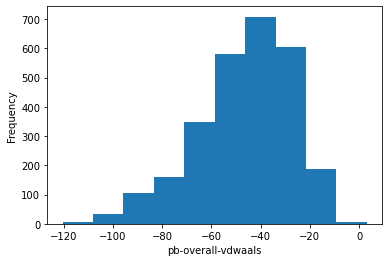

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('pb-overall-vdwaals')
df['pb-overall-vdwaals'].plot.hist()

In [10]:
training_columns = [f for f in df.columns if f.__contains__('overall')]

<AxesSubplot:xlabel='gb-overall-eelec', ylabel='Frequency'>

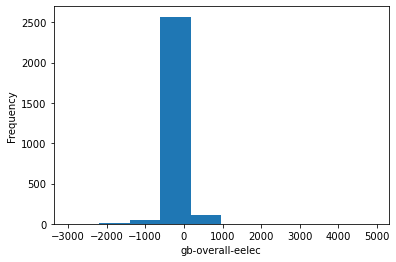

In [11]:
plt.xlabel('gb-overall-eelec')
df['gb-overall-eelec'].plot.hist()

<AxesSubplot:xlabel='gb-overall-eelec normalized', ylabel='Frequency'>

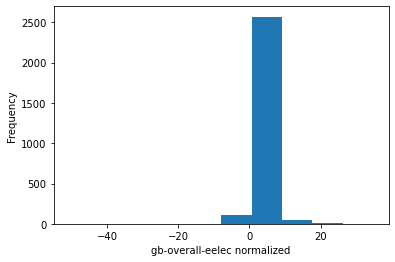

In [12]:
plt.xlabel('gb-overall-eelec normalized')
((df['gb-overall-eelec'] - df['gb-overall-eelec'].std()) / df['gb-overall-eelec'].mean()).plot.hist()

<h1>Reading Mobley PDB files</h1>
<p>Here each PDB file will be read and saved in Mol data type defined in RDKit and used by DeepChem</p>

In [11]:
# PDBs = {}
# from os import listdir
# from os.path import isfile, join
# mypath = '../Datasets/pdb-test/'
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# for f in onlyfiles:
#     PDBs.update({f.split('.')[0] : rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + f)})

In [12]:
# ## Save PDB
# import pickle
# with open('PDBs.pkl', 'wb') as file:
#     pickle.dump(PDBs, file)

In [13]:
## Load PDB
import pickle
PDBs = {}
with open('PDBs.pkl', 'rb') as file:
    PDBs = pickle.load(file)

<h1>Featurizing</h1>
<p>GraphConv model needs ConvMolFeaturizer</p>

In [14]:
featurizer = dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)
TRAIN_SET = .8

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[training_columns]),
                   columns=training_columns)

<AxesSubplot:xlabel='gb-overall-1-4-eel', ylabel='Frequency'>

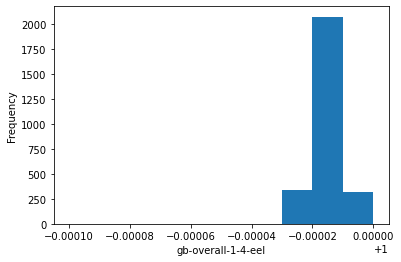

In [28]:
plt.xlabel('gb-overall-1-4-eel')
df_scaled['gb-overall-1-4-eel'].plot.hist(range=[0.9999, 1.0])

In [15]:
X = []
X_ids = []
# one_add = 0 if len(PDBs.keys()) % 2 == 0 else 1
for k in PDBs.keys():
    X_ids.append(k)
    X.append(featurizer.featurize(PDBs[k]))
split_index = int(len(X) * TRAIN_SET)
X = [x[0] for x in X]
X_train_featurized = X[:split_index]
X_test_featurized = X[split_index:]

In [11]:
pdb_names = [i for i in X_ids]

In [12]:
pdb_names_train = pdb_names[:split_index]
pdb_names_test = pdb_names[split_index:]

In [13]:
x_add_train, x_add_test, y_train, y_test = [], [], [], []
for i in range(len(pdb_names_train)):
    new_df = df[(df['complex-name'] == pdb_names_train[i])]
    y_train.append(new_df['ddg'].to_numpy()[0])
    x_add_train.append(-new_df[training_columns].to_numpy()[0])
y_train = np.array(y_train)
    
for i in range(len(pdb_names_test)):
    new_df = df[(df['complex-name'] == pdb_names_test[i])]
#     print(pdb_names_test[i])
#     print(new_df['ddg'].to_numpy())
    y_test.append(new_df['ddg'].to_numpy()[0])
    x_add_test.append(-new_df[training_columns].to_numpy()[0])
y_test = np.array(y_test)

In [14]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

x_preprocessed_train, x_preprocessed_test = [], []

## for X train
multiConvMol = ConvMol.agglomerate_mols(X_train_featurized)
x_preprocessed_train = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_train.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_train.append(np.array(x_add_train))

## for X test
multiConvMol = ConvMol.agglomerate_mols(X_test_featurized)
x_preprocessed_test = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_test.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_test.append(np.array(x_add_test))

In [18]:
x_train = np.full([14, np.max([v.shape[0] for v in x_preprocessed_train]),
                  np.max([v.shape[1] for v in x_preprocessed_train if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_train):
    if len(j.shape) > 1:
        x_train[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_train[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_train = x_train.reshape([1] + list(x_train.shape))

x_test = np.full([14, np.max([v.shape[0] for v in x_preprocessed_test]),
                  np.max([v.shape[1] for v in x_preprocessed_test if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_test):
    if len(j.shape) > 1:
        x_test[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_test[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_test = x_test.reshape([1] + list(x_test.shape))

<h1>Creating Model</h1>

In [19]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import keras.backend as K
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
from tensorflow.keras import initializers
import sys
import tensorflow as tf
import random


class GBGraphConvModel(tf.keras.Model):

  def modify_graphgather(self, batch_size):
    self.readout.batch_size = batch_size
    self.batch_size = batch_size
    
  def __init__(self, batch_size):
    super(GBGraphConvModel, self).__init__()
    self.input_shapes = None
    self.batch_size = batch_size
    self.gc1 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(128, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=self.batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(64, activation=tf.nn.sigmoid)
    self.dense3 = layers.Dense(1)
    
    ## Dense for overall
    self.dense4 = layers.Dense(1, 
     kernel_initializer=initializers.Constant([.5, 1, 1, 1, 1, 1]),
     bias_initializer=initializers.Zeros(), activation=tf.keras.activations.relu)
#     self.dense4 = layers.Dense(1, 
#          kernel_initializer=initializers.Constant([.5, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1]),
#          bias_initializer=initializers.Zeros(), activation=tf.keras.activations.relu)

  def call(self, inputs):
#     x_feat, x_add = inputs[0], inputs[1]
    inputs = inputs[0]
    x = []
#     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
#                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
    for i in range(len(self.input_shapes)):
        x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], self.input_shapes[i]))
    for i in range(1, len(self.input_shapes)):
        x[i] = tf.cast(x[i], tf.int32)
    x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [self.batch_size, 5])

    gc1_output = self.gc1(x)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + x[1:])

    gc2_output = self.gc2([gp1_output] + x[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + x[1:])

    dense1_output = self.dense1(gp2_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + x[1:])
    
    model_var = self.dense2(readout_output)
    model_var = self.dense3(model_var)
    binding_affinity = tf.concat([model_var, x_add], axis=1)
    ddg = self.dense4(binding_affinity)
    tf.print(self.dense4.weights, output_stream="file://weights.txt", summarize=30)
    tf.print(binding_affinity[0], output_stream="file://binding_a.txt", summarize=30)
    tf.print(ddg[0], output_stream="file://ddg.txt")
    tf.print(model_var, output_stream="file://model_var.txt", summarize=30)
    tf.print("-------------------------", output_stream=sys.stdout)
    return ddg

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = GBGraphConvModel(split_index)
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
K.set_value(model.optimizer.learning_rate, 0.001)

In [20]:
model.input_shapes = [i.shape for i in x_preprocessed_train]
history = model.fit(x_train, -y_train.reshape([1, -1]), epochs=3)

Epoch 1/3


/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Reshape_14:0", shape=(34113,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Reshape_13:0", shape=(34113, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Reshape_17:0", shape=(82976,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Reshape_16:0", shape=(82976, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_gr

InvalidArgumentError: Graph execution error:

Detected at node 'gb_graph_conv_model_1/Reshape_14' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/ali/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/ali/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell
      await result
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 359, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/ali/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ali/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "/home/ali/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "/home/ali/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ali/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ali/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ali/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_9023/85814939.py", line 2, in <module>
      history = model.fit(x_train, -y_train.reshape([1, -1]), epochs=3)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ali/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ali/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/tmp/ipykernel_9023/1980227167.py", line 54, in call
      x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [self.batch_size, 5])
Node: 'gb_graph_conv_model_1/Reshape_14'
Input to reshape is a tensor with 465 values, but the requested shape has 155
	 [[{{node gb_graph_conv_model_1/Reshape_14}}]] [Op:__inference_train_function_20732]

In [23]:
import matplotlib.pyplot as plt
df['gb-complex-1-4-eel'].max()

148767.0008

In [23]:
model.input_shapes = [i.shape for i in x_preprocessed_test]
model.modify_graphgather(len(X) - split_index)

In [24]:
model.evaluate(x_test, y_test.reshape([1, -1]))

[[[0.496837735]
 [1.00316226]
 [0.996837735]
 ...
 [0.996837735]
 [-1.00316226]
 [-1.00316226]], [-0.0031622753]]
[0.650298357 -16127.6348 19940.8438 ... 2215.14038 2134.90894 13.8664]
[0]
-------------------------
1/1 [==============================] - 1s 750ms/step - loss: 9.0176


9.017557144165039

In [28]:
np.sqrt(38.70)

6.220932405998316

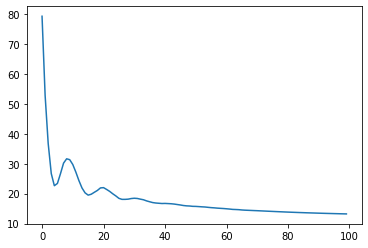

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [94]:
df.columns

Index(['ID', 'dataset group name', 'Dataset Name', 'Host', 'Guest',
       'Ex _G_(kcal/mol)', 'Ex _G_SEM', 'EX _H_(kcal/mol)', 'EX _H_SEM',
       'pb_guest_Etot', 'pb_guest_VDWAALS', 'pb_guest_EELEC', 'pb_guest_EPB',
       'pb_guest_ECAVITY', 'pb_host_Etot', 'pb_host_VDWAALS', 'pb_host_EELEC',
       'pb_host_EPB', 'pb_host_ECAVITY', 'pb_complex_Etot',
       'pb_complex_VDWAALS', 'pb_complex_EELEC', 'pb_complex_EPB',
       'pb_complex_ECAVITY', 'gb_Complex_Etot', 'gb_Complex_1-4EEL',
       'gb_Complex_EELEC', 'gb_Complex_EGB', 'gb_Complex_ESURF',
       'gb_guest_Etot', 'gb_guest_1-4EEL', 'gb_guest_EELEC', 'gb_guest_EGB',
       'gb_guest_ESURF', 'gb_host_Etot', 'gb_host_1-4EEL', 'gb_host_EELEC',
       'gb_host_EGB', 'gb_host_ESURF', 'gb_delta_H', 'pb_delta_H',
       'EX _delta_H_(kcal/mol)', 'gb_Ex_difference',
       'SQR_gbnsr6_Ex_difference', 'pb_Ex_difference'],
      dtype='object')

In [97]:
np.sqrt(np.mean((df['EX _H_(kcal/mol)'].to_numpy() - df['gb_delta_H'].to_numpy())**2))

8.485930943559929

In [98]:
(8.48 - 5.83)

2.6500000000000004